###  Задача 1. (2 балла)
Позволяет ли предсказывать корректные вероятности:

1) квадратичная функция потерь $L(y, z) =(y-z)^2$, 

2) экспоненциальная функция потерь $L(y, z) = \exp(-yz)$ ?

Проверим, что значение вероятности $p(y=+1|x)=p$ доставляет минимум матожидания функции потерь  
1) Метка положительносго класса 1, метка отрицательного 0  
$$E=E[L(y,z)|x]=p*(z-1)^2+(1-p)*z^2$$
$$\frac{\partial E}{\partial z}=2p(z-1)+2(1-p)z=0$$
$$2z=2p$$
$$z=p$$
p - локальный минимум => Квадратичная функция потерь позволяет предсказывать корректные вероятности

2) Пусть метка положительного класса - a, отрицательного - b
$$E=E[L(y,z)|x]=p*e^{-az}+(1-p)*e^{-bz}$$
$$\frac{\partial E}{\partial z}=-p*e^{-az}-(1-p)*e^{-bz}=0$$
$$e^{(b-a)z}=\frac{p-1}{p}$$
$$z=\frac{1}{b-a}\ln\frac{p-1}{p}$$
Не выполнены необходимые условия первого порядка в точке p => экспоненциальная функция не предсказывает корректные вероятности

### Задача 2.  (2 балла)
Рассмотрим два вектора, $v_1=(1,1,2)$ и $v_2=(1,1,1)$. Переход в спрямляющее пространство осуществляется с помощью гауссовской ядерной функции $K(v,v {'})=\exp(-\gamma|v-v{'}|^2)$.
*  Как от $\gamma$ зависят длины векторов в спрямляющем пространстве?
*  Как от $\gamma$ зависит угол между векторами в спрямляющем пространстве?

$$\|\phi(x)\|=\sqrt{\langle \phi(x),\phi(x) \rangle}=\sqrt{K(x,x)}=\sqrt{\exp(-\gamma|x-x|^2)}=1$$
Получается, длины не зависят от $\gamma$
$$\cos(\phi(x),\phi(y))=\frac{\langle \phi(x),\phi(x) \rangle}{\|\phi(x)\|\|\phi(y)\|}=K(x,y)=\exp(-\gamma|x-y|^2)$$
$$\cos(\phi(v_1),\phi(v_2))=\exp(-\gamma1^2)=\exp(-\gamma)$$
Получили зависимость косинуса угла между данными векторами в спрямляющем пространстве от гамма

### Задача 3. (2 балла) 

Является ли функция $K(x,z)=\cos(x-z)$ ядром?

$$ K(x,x{'})=\phi(x)\phi(x{'}) - ядро \; \forall \phi:X \rightarrow R  $$
$$ K(x,x{'})=\alpha K_0(x,x{'})+ \beta K_1(x,x{'}) - ядро, если K_0, K_1 - ядра, \alpha, \beta \geq 0$$
$$ \cos(x-z)=\cos(x)\cos(z)+\sin(x)\cos(y)$$
Значит данная функция является ядром

### Задача 4. (4 балла)

In [51]:

import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Сгенерируем синтетические данные:

In [52]:
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

####  1. Обучите метод опорных векторов. Воспользуйтесь классом [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).

In [53]:
from sklearn.svm import LinearSVC

clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train);

y_pred = clf.predict(X_test)

#### 2. Чему равны доля верных предсказаний, точность, полнота и F-мера классификатора? 

In [54]:
from sklearn import metrics

print ('Accuracy =', metrics.accuracy_score(y_test, y_pred))
print ('Precision =', metrics.precision_score(y_test, y_pred))
print ('Recall =', metrics.recall_score(y_test, y_pred))
print ('F1 score =', metrics.f1_score(y_test, y_pred))

Accuracy = 0.7716666666666666
Precision = 0.7758620689655172
Recall = 0.7712590639419907
F1 score = 0.7735537190082645


#### 3.  Постройте ROC кривую. Определите AUC-ROC. 
Обратите внимание, что метод опорных векторов  не умеет predict_proba, но имеет метод decision_function.
Определите вероятности принадлежности к положительному классу как:
$$P(y=+1|x)=\frac{a(x)-\min(a_i)}{\max(a_i)-\min(a_i)}$$

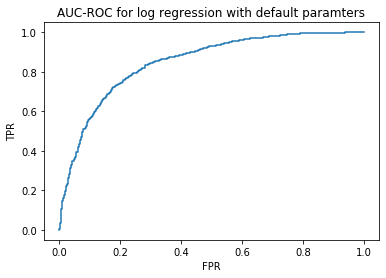

AUC-ROC 0.8476457642781673


In [55]:
a = clf.decision_function(X_test)
P = (a - a.min())/(a.max() - a.min())

fpr, tpr, thresholds = metrics.roc_curve(y_test, P)
plt.plot(fpr, tpr)
plt.xlabel('FPR')

plt.ylabel('TPR')
plt.title("AUC-ROC for log regression with default paramters")
plt.show()

print("AUC-ROC {}".format(metrics.auc(fpr, tpr)))

#### 4. Калибровка вероятностей.  

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых.

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. 
#### Нарисуйте для найденных вероятностей калибровочную кривую, сравните с диагональю. 
Воспользуйтесь [calibration_curve](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html).

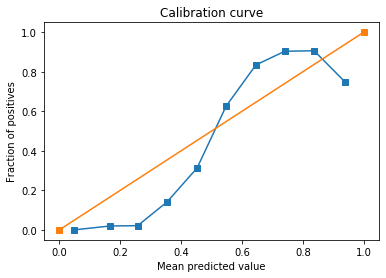

In [56]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, P, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-");
plt.plot([0,1], [0,1], "s-");
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title("Calibration curve")
plt.show()


Воспользуйтесь [CalibratedClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV)из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

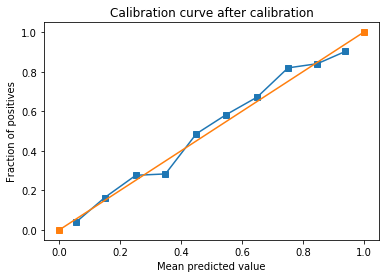

In [57]:
sigmoid = CalibratedClassifierCV(LinearSVC(max_iter=10000), cv=3, method='sigmoid')

sigmoid.fit(X_train, y_train)
y_pred = sigmoid.predict(X_test)
P_calibrated = sigmoid.predict_proba(X_test)[:,1]
 
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, P_calibrated, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-");
plt.plot([0,1], [0,1], "s-");
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title("Calibration curve after calibration")
plt.show()

До калибровки вероятностей, калибровочная кривая не была похоже на диагональ, после - стала похожа